# Data Analysis For Business Insights

##### Scenario You are a Data Analyst working for ShopEase, an online retail company. The company wants to improve sales performance and customer satisfaction by analysing its sales data.

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the excel data
df = pd.read_excel("data/sales_data.xlsx")

#### Explore and clean  the data

In [3]:
#Checking the dataset
df.head()

,Transaction_ID,Date,Customer_ID,Product,Category,Quantity,Price,Total_Amount,Payment_Method,Region
0,1001,2024-01-05,C001,Laptop,Electronics,1,800,NaN,Credit Card,North
1,1002,2024-01-10,C002,Smartphone,Electronics,2,600,1200.0,Cash,South
2,1003,2024-01-12,C003,Headphones,Electronics,1,100,100.0,PayPal,West
3,1004,2024-02-05,C004,Tablet,Electronics,1,500,500.0,Debit Card,East
4,1005,2024-02-08,C005,Book,Books,3,20,60.0,Credit Card,North


In [108]:
#Checking the number of rows and columns

print(f'There are {df.shape[0]} transactions with {df.shape[1]} features ')

There are 20 transactions with 11 features 


In [5]:
#Numerical and categorical columns and datatype
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction_ID  20 non-null     int64  
 1   Date            20 non-null     object 
 2   Customer_ID     20 non-null     object 
 3   Product         20 non-null     object 
 4   Category        20 non-null     object 
 5   Quantity        20 non-null     int64  
 6   Price           20 non-null     int64  
 7   Total_Amount    19 non-null     float64
 8   Payment_Method  20 non-null     object 
 9   Region          20 non-null     object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.7+ KB


In [6]:
#Converting column names to lower case
df.columns = df.columns.str.lower()

In [7]:
#Checking null values
df.isna().sum()

transaction_id    0
date              0
customer_id       0
product           0
category          0
quantity          0
price             0
total_amount      1
payment_method    0
region            0
dtype: int64

In [8]:
#Checking for duplicates
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

In [9]:
#customers who made multiple purchases
duplicate_customers = df.customer_id.duplicated()
df[duplicate_customers]



,transaction_id,date,customer_id,product,category,quantity,price,total_amount,payment_method,region
5,1006,2024-02-10,C001,Laptop,Electronics,1,800,800.0,Credit Card,North
10,1011,2024-04-05,C002,Smartphone,Electronics,2,600,1200.0,Cash,South


In [10]:
#Delete dupicate cutomer_id's to check how the result varies
# df = df.drop_duplicates(subset='customer_id', keep='first')
# df.shape

In [11]:
#Converting date to datetime format
df['date'] =pd.to_datetime(df['date'])

In [12]:
#Filling missing values in total_amount column
df['total_amount'] = df.apply(lambda x : x['price'] * x['quantity'] 
                                        if pd.isna(x['total_amount']) else x['total_amount'], axis = 1)

In [13]:
#Extracting month from date for further visualization
df['month'] = df['date'].dt.month

In [14]:
df.head()

,transaction_id,date,customer_id,product,category,quantity,price,total_amount,payment_method,region,month
0,1001,2024-01-05,C001,Laptop,Electronics,1,800,800.0,Credit Card,North,1
1,1002,2024-01-10,C002,Smartphone,Electronics,2,600,1200.0,Cash,South,1
2,1003,2024-01-12,C003,Headphones,Electronics,1,100,100.0,PayPal,West,1
3,1004,2024-02-05,C004,Tablet,Electronics,1,500,500.0,Debit Card,East,2
4,1005,2024-02-08,C005,Book,Books,3,20,60.0,Credit Card,North,2


In [15]:
#cleaned dataset
df.to_excel('data/cleaned_sales_data.xlsx', index= False)

## Exploratory Data Analysis

In [16]:
#loading cleaned dataset
df = pd.read_excel('data/cleaned_sales_data.xlsx')

In [17]:
df.head()

,transaction_id,date,customer_id,product,category,quantity,price,total_amount,payment_method,region,month
0,1001,2024-01-05,C001,Laptop,Electronics,1,800,800,Credit Card,North,1
1,1002,2024-01-10,C002,Smartphone,Electronics,2,600,1200,Cash,South,1
2,1003,2024-01-12,C003,Headphones,Electronics,1,100,100,PayPal,West,1
3,1004,2024-02-05,C004,Tablet,Electronics,1,500,500,Debit Card,East,2
4,1005,2024-02-08,C005,Book,Books,3,20,60,Credit Card,North,2


In [18]:
#Checking summary statistics of the dataset
df.describe()

,transaction_id,date,quantity,price,total_amount,month
count,20.00000,20,20.000000,20.000000,20.000000,20.000000
mean,1010.50000,2024-03-30 06:00:00,1.550000,325.500000,396.500000,3.700000
min,1001.00000,2024-01-05 00:00:00,1.000000,20.000000,25.000000,1.000000
25%,1005.75000,2024-02-09 12:00:00,1.000000,43.750000,78.750000,2.000000
50%,1010.50000,2024-04-03 00:00:00,1.000000,200.000000,200.000000,4.000000
75%,1015.25000,2024-05-08 12:00:00,2.000000,600.000000,650.000000,5.000000
max,1020.00000,2024-06-10 00:00:00,4.000000,800.000000,1200.000000,6.000000
std,5.91608,NaN,0.887041,302.484884,390.418466,1.780006


In [19]:
#total sales for the period of january 2024 to june 2024
total_sales = df['total_amount'].sum()
total_sales

7930

In [20]:
#sales based on month
sales_month = df.groupby(['month'])['total_amount'].sum().sort_values(ascending=False).reset_index()
sales_month

,month,total_amount
0,1,2100
1,4,1740
2,6,1380
3,2,1360
4,5,1025
5,3,325


In [21]:
#mean sales based on month
sales_month = df.groupby(['month'])['total_amount'].mean().sort_values(ascending=False).reset_index()
sales_month

,month,total_amount
0,1,700.000000
1,4,580.000000
2,2,453.333333
3,6,345.000000
4,5,256.250000
5,3,108.333333


In [22]:
#sales by category
category_summary = df.groupby('category').agg(
    category_sold_count = ('quantity', 'sum'),
    sales_category = ('total_amount', 'sum')
).sort_values(by='sales_category', ascending= False).reset_index()
category_summary

,category,category_sold_count,sales_category
0,Electronics,15,7500
1,Clothing,7,250
2,Books,9,180


In [83]:
#sales by product
product_summary = df.groupby(['product']). agg(
    total_product_sold = ('quantity', 'sum'),
    sales_product = ('total_amount', 'sum')
).sort_values(by= 'sales_product', ascending= False).reset_index()
product_summary

,product,total_product_sold,sales_product
0,Smartphone,5,3000
1,Laptop,3,2400
2,Tablet,3,1500
3,Smartwatch,2,400
4,Headphones,2,200
5,Book,9,180
6,Shoes,3,150
7,T-Shirt,4,100


In [24]:
#sales based on region
sales_region = df.groupby(['region'])['total_amount'].sum().sort_values(ascending=False).reset_index(name= 'total_sales')
sales_region

,region,total_sales
0,South,3225
1,North,2580
2,East,1900
3,West,225


In [25]:
#Sales for different regions based on category
sales_category_region = df.groupby(['region', 'category'])['total_amount'].sum().reset_index(name='sales')
sales_category_region

,region,category,sales
0,East,Electronics,1900
1,North,Books,180
2,North,Electronics,2400
3,South,Clothing,225
4,South,Electronics,3000
5,West,Clothing,25
6,West,Electronics,200


In [26]:
#Sales for different regions based on product
sales_product_region = df.groupby(['region', 'product'])['total_amount'].sum().reset_index(name='sales')
sales_product_region

,region,product,sales
0,East,Smartwatch,400
1,East,Tablet,1500
2,North,Book,180
3,North,Laptop,2400
4,South,Shoes,150
5,South,Smartphone,3000
6,South,T-Shirt,75
7,West,Headphones,200
8,West,T-Shirt,25


In [27]:
#most used payment method
payment_method = df.groupby(['payment_method']).size().reset_index(name='count')
payment_method

,payment_method,count
0,Cash,6
1,Credit Card,6
2,Debit Card,5
3,PayPal,3


In [28]:
#most used payment method by region
payment_method_region = df.groupby(['region', 'payment_method']).size().reset_index(name='count')
payment_method_region

,region,payment_method,count
0,East,Debit Card,5
1,North,Credit Card,6
2,South,Cash,6
3,West,PayPal,3


In [110]:
#correlation between proce, quantity and total_amount
corr = df[['price','quantity', 'total_amount' ]].corr()


### Visualization

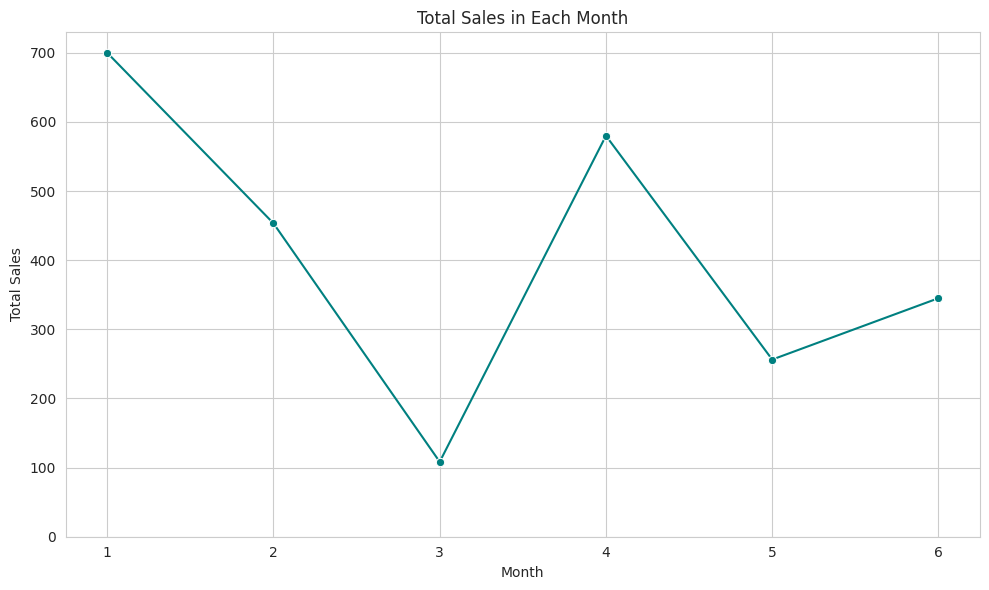

In [30]:
#Sales by month
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')  # other options: 'darkgrid', 'ticks', 'white', 'dark'
sns.lineplot(data=sales_month, x='month', y='total_amount', marker='o', color= 'teal')


#Styling
plt.ylim(0, None)

plt.title('Total Sales in Each Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


- **Sales increased notably in January and April.**
- This pattern suggests a possible link to post-holiday shopping behaviors.
- January follows the Christmas and New Year holidays, a period when customers:
  - Redeem holiday gift cards or bonuses.
  - Take advantage of post-holiday clearance sales.
- April aligns with the Easter holiday season in many regions, potentially leading to:
  - Increased purchases for Easter gifts and events.
  - Seasonal product promotions and offers.


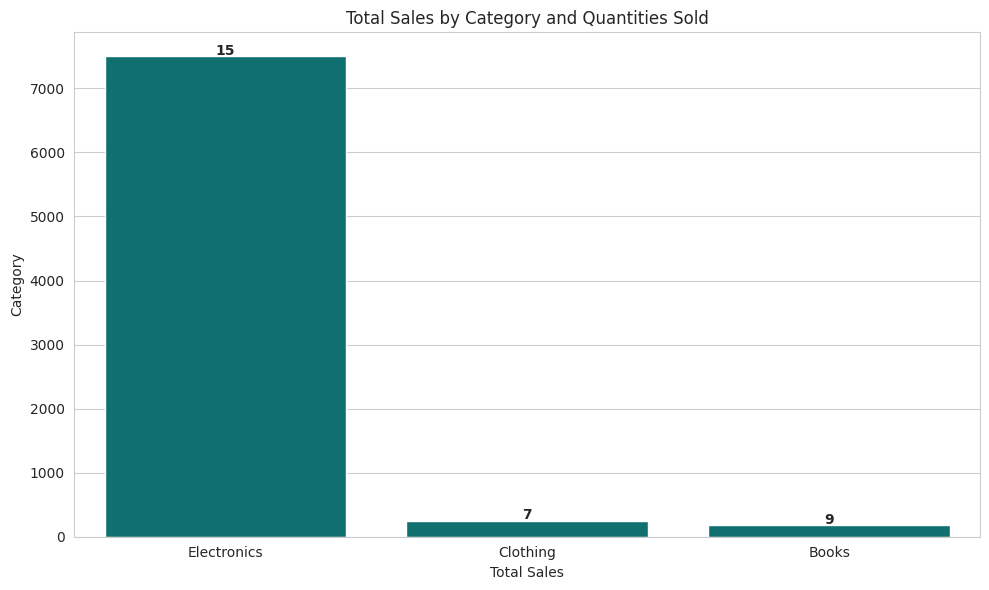

In [31]:
#Sales and quantity sold based on categories'
plt.figure(figsize= (10,6))
sns.barplot(data=category_summary, x= 'category', y= 'sales_category', color = 'teal')

# Add value labels on top of each bar
for index, row in category_summary.iterrows():
    #print(index,row['sales_category'], row['category_sold_count'])
    plt.text(x=index, 
             y=row['sales_category'] + 20,   # add a small offset for clarity
             s=int(row['category_sold_count']), 
             ha='center', 
             fontweight='bold')


plt.title('Total Sales by Category and Quantities Sold')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


**Electronics are the leading category by revenue and quantity sold.**

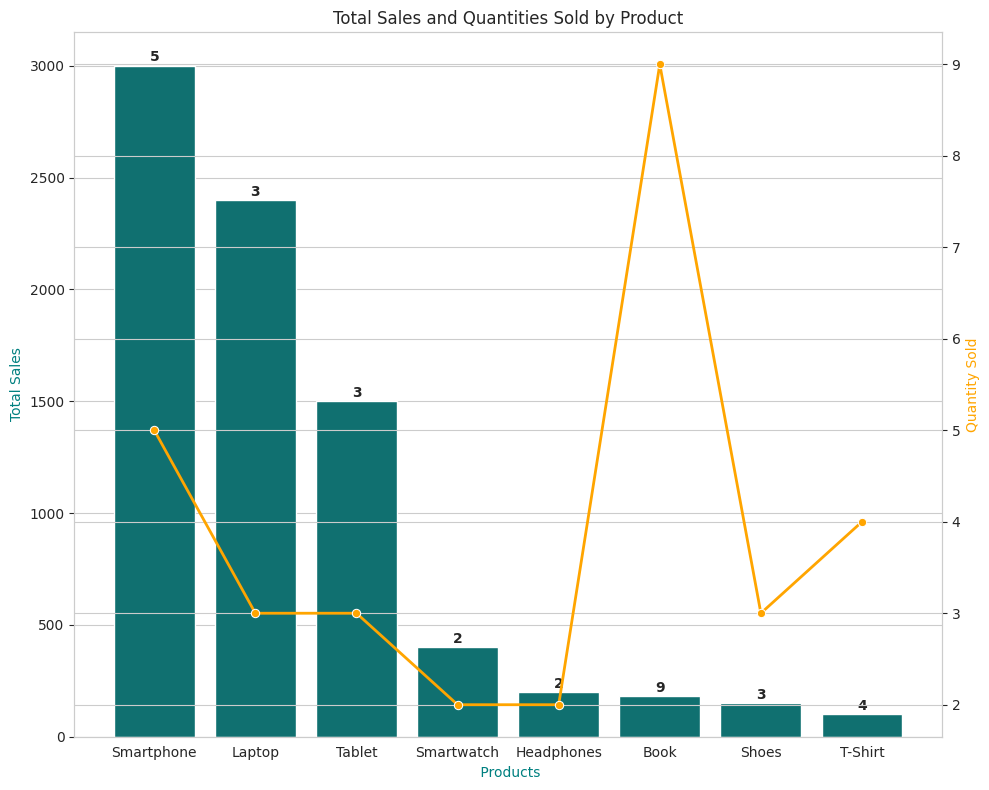

In [84]:
fig, ax1 = plt.subplots(figsize=(10,8))
# Barplot for total sales
sns.barplot(data=product_summary, x='product', y='sales_product', color = 'teal', ax=ax1)
ax1.set_ylabel('Total Sales', color='teal')
ax1.set_xlabel(' Products', color='teal')

# Lineplot for total quantity sold
ax2 = ax1.twinx()
sns.lineplot(data=product_summary, x='product', y='total_product_sold', color='orange', marker='o', linewidth=2, ax=ax2)
ax2.set_ylabel('Quantity Sold', color='orange')

# Add quantity labels on top of each bar
for index, row in product_summary.iterrows():
    ax1.text(x=index, 
             y=row['sales_product'] + 20, 
             s=int(row['total_product_sold']),
             ha='center',
             fontweight='bold')

# Title and layout
plt.title('Total Sales and Quantities Sold by Product')
plt.xlabel('Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Smartphones have the highest total sales.
- Books have a very high quantity sold (9 units) despite low total sales, suggesting a low price per unit.



Text(0, 0.5, 'Sales')

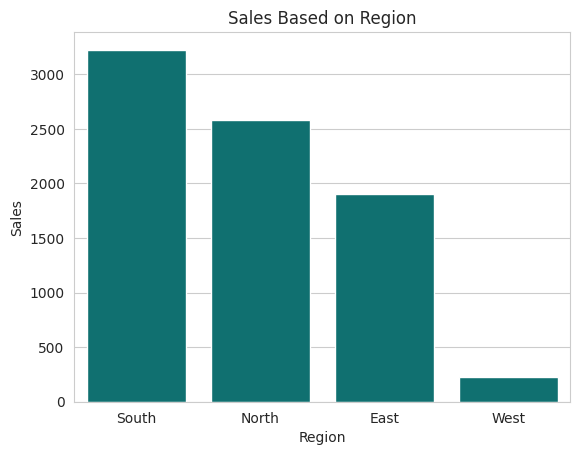

In [85]:
sns.barplot(data=sales_region, x= 'region', y='total_sales', color='teal')
plt.title('Sales Based on Region')
plt.xlabel('Region')
plt.ylabel('Sales')

- South region has more sales.

Text(0, 0.5, 'Sales')

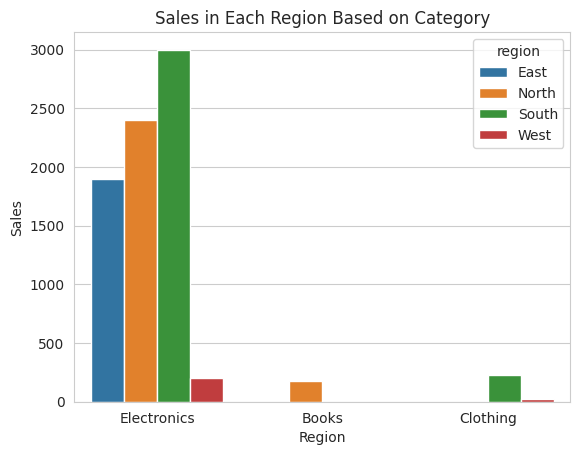

In [54]:
sns.barplot(data = sales_category_region, x = 'category', y= 'sales', hue='region')
plt.title('Sales in Each Region Based on Category')
plt.xlabel('Region')
plt.ylabel('Sales')

- Each region appears to specialize in or focus on different products.
- The South has the highest single product sales (Smartphones).
- The East and North each show a strong performance in a single product category (Tablet and Laptop, respectively).
- The West shows generally lower sales overall.

Text(0, 0.5, 'Sales')

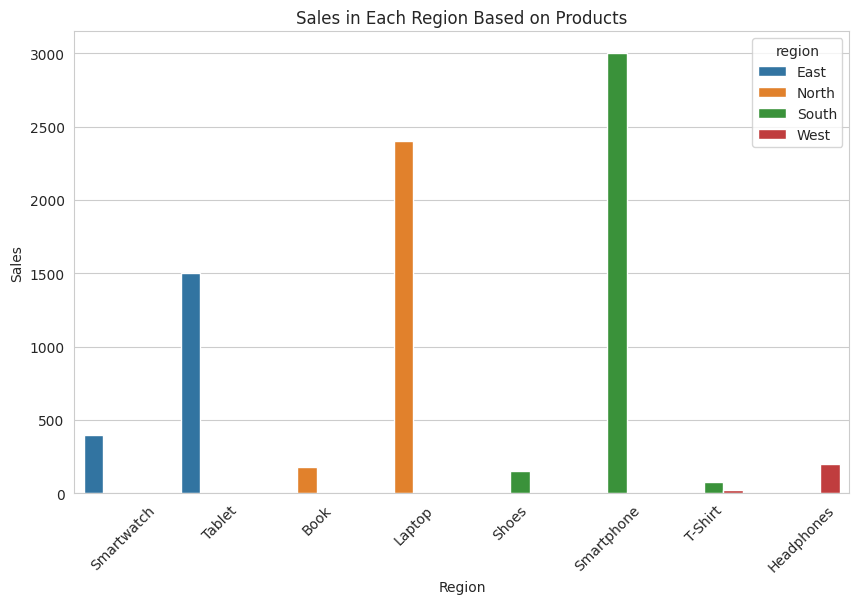

In [91]:
plt.figure(figsize=(10,6))
sns.barplot(data = sales_product_region, x = 'product', y= 'sales', hue='region')

plt.title('Sales in Each Region Based on Products')
plt.xticks(rotation =45)
plt.xlabel('Region')
plt.ylabel('Sales')

- The South region leads in electronics sales, primarily due to strong performance in smartphone sales.
- The South region also performs best in clothing, with sales in both shoes and t-shirts.
- The North region is the only one with notable sales in books.
- The East region shows strong performance in electronics as well, particularly in tablet sales
- The West region has minimal sales overall, with some contribution in electronics through headphone sales and very limited clothing sales.

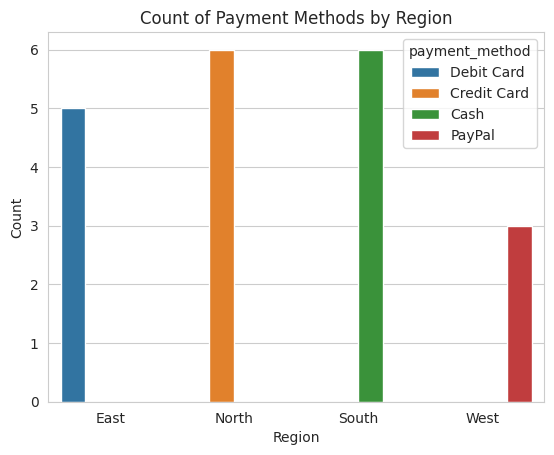

In [35]:
sns.barplot(data=payment_method_region, x='region', y='count', hue='payment_method')
plt.title('Count of Payment Methods by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

- Payment preference for each region is different

In [36]:
correlation = df[['quantity', 'price', 'total_amount']].corr()

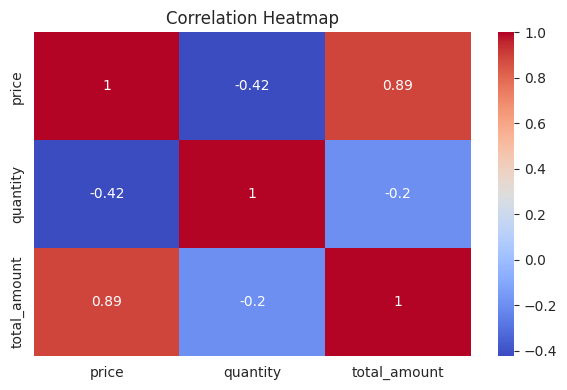

In [37]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


- There is a weak negative correlation between quantity and total amount, implying that selling more units does not necessarily lead higher total amount, possibly due to lower prices associated with higher sales volumes.